## Example of lightcurve generation

In [1]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sso_tools import catalogs
from sso_tools import lightcurves as lcc
from sso_tools import ztf

In [3]:
# Read (previously pulled from database) alert data
datadir = '/epyc/projects/sso-lc/notebooks/jan_04'
alertdata = ztf.read_alert_datafile(os.path.join(datadir, 'ztf_alerts_sso.csv'))

In [4]:
# Identify candidates -- just minimum # of observations, per object
objnames = ztf.identify_candidates(alertdata, min_obs=50, dist_cutoff=10)

In [5]:
print('Alerts ranging from %s to %s' % (alertdata.obsdate.min(), alertdata.obsdate.max()))
print("Total SSO alerts %d" % len(alertdata))
print("Number of different objects %d" % len(alertdata.groupby('ssnamenr')))
print("Number of nights included %d" % len(alertdata.groupby('nid')))
print("Looking for %d objects in this set." % (len(objnames)))

Alerts ranging from 2018-06-19T04:17:25.002 to 2019-01-04T13:51:14.996
Total SSO alerts 2118329
Number of different objects 178173
Number of nights included 155
Looking for 4131 objects in this set.


In [6]:
name = '68950'

In [7]:
# Generate oorb-corrected magnitudes (and pull JPL database)
# Note when pulling out observations here, the only outlier rejection is based on ssdistnr
print(name)
ast = ztf.AsteroidObj(magcol='magpsf')
ast(alertdata, name, minJD=None, maxJD=None)

68950
Filter 2 (r) has 136 observations
Filter 1 (g) has 120 observations


In [10]:
# Look at the orbit info (from JPL) - this is a pandas Series
ast.orbit

des                        68950
fullname       68950 (2002 QF15)
FORMAT                       KEP
a                           1.06
q                          0.693
e                          0.344
inc                         25.2
Omega                        236
argPeri                      255
tPeri                      58555
meanAnomaly                 40.8
epoch                      58600
H                           16.4
g                           0.15
diam                         NaN
albedo                       NaN
rot                           47
dtype: object

In [11]:
# Look at the information in the observations - this is a pandas DataFrame
print(ast.obs.columns.values)
ast.obs[0:3]

['objectId' 'jd' 'fid' 'pid' 'diffmaglim' 'programid' 'candid' 'isdiffpos'
 'tblid' 'nid' 'rcid' 'field' 'xpos' 'ypos' 'ra' 'decl' 'magpsf'
 'sigmapsf' 'chipsf' 'magap' 'sigmagap' 'distnr' 'magnr' 'sigmagnr'
 'chinr' 'sharpnr' 'sky' 'magdiff' 'fwhm' 'classtar' 'mindtoedge'
 'magfromlim' 'seeratio' 'aimage' 'bimage' 'aimagerat' 'bimagerat' 'elong'
 'nneg' 'nbad' 'rb' 'ssdistnr' 'ssmagnr' 'ssnamenr' 'sumrat' 'magapbig'
 'sigmagapbig' 'ranr' 'decnr' 'sgmag1' 'srmag1' 'simag1' 'szmag1'
 'sgscore1' 'distpsnr1' 'ndethist' 'ncovhist' 'jdstarthist' 'jdendhist'
 'scorr' 'tooflag' 'objectidps1' 'objectidps2' 'sgmag2' 'srmag2' 'simag2'
 'szmag2' 'sgscore2' 'distpsnr2' 'objectidps3' 'sgmag3' 'srmag3' 'simag3'
 'szmag3' 'sgscore3' 'distpsnr3' 'nmtchps' 'rfid' 'jdstartref' 'jdendref'
 'nframesref' 'rbversion' 'dsnrms' 'ssnrms' 'dsdiff' 'magzpsci'
 'magzpsciunc' 'magzpscirms' 'nmatches' 'clrcoeff' 'clrcounc' 'zpclrcov'
 'zpmed' 'clrmed' 'clrrms' 'neargaia' 'neargaiabright' 'maggaia'
 'maggaiabright' 

,objectId,jd,fid,pid,diffmaglim,programid,candid,isdiffpos,tblid,nid,...,exptime,obsdate,mjd,magcorrZTF,magOO,phaseangle,heliodist,geodist,velocity,magcorrOO
9688,ZTF18abdcefi,2.458296e+06,2,541270993215,19.8282,2,541270993215015012,t,12,541,...,NaN,2018-06-26T06:30:14.003,58295.270567,-0.5019,16.766421,40.718791,1.333527,0.484881,0.732286,-0.268321
9690,ZTF18abdcidz,2.458296e+06,2,541291853215,20.0826,2,541291853215015007,t,7,541,...,NaN,2018-06-26T07:00:16.004,58295.291424,-0.4769,16.766738,40.715629,1.333590,0.484948,0.732852,-0.243638
9709,ZTF18abdcjki,2.458296e+06,2,541297713215,20.1548,2,541297713215015020,t,20,541,...,NaN,2018-06-26T07:08:42.999,58295.297292,-0.4781,16.766827,40.714733,1.333608,0.484967,0.732936,-0.244927


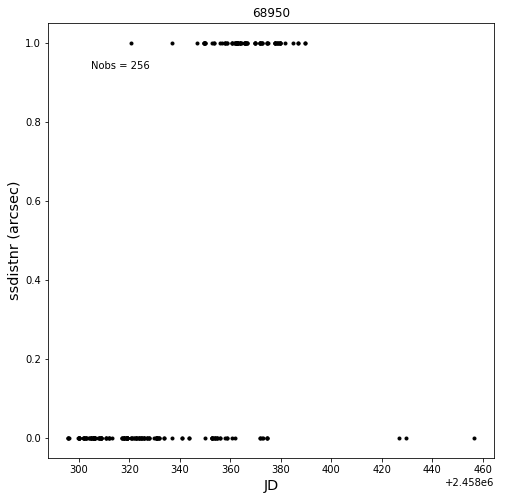

In [12]:
# Can check the ZTF predicted astrometric residuals (ssdistnr)
fig = ast.check_astrometry()

Average color r-g = -0.47


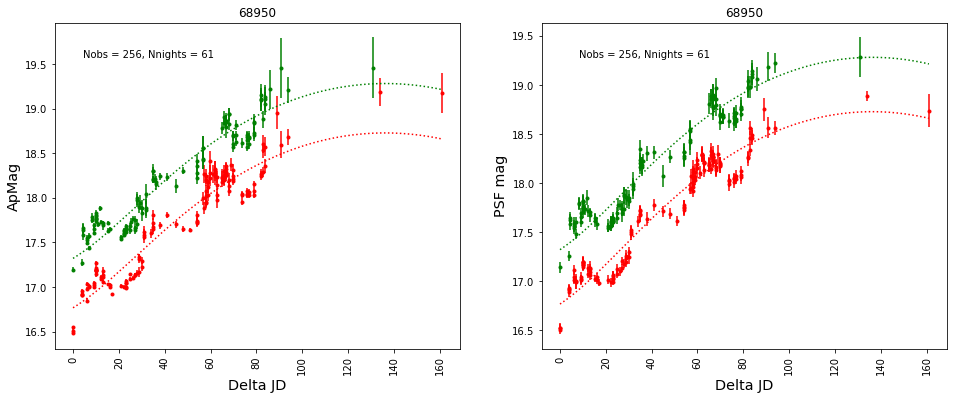

In [13]:
# Look at the photometry and oorb predicted magnitudes
fig = ast.vis_psf_ap_photometry()
# Add visualization of outlier rejection here too? 

Finding optimal frequency:
 - Estimated peak width = 0.0391
 - Using 200 steps per peak; omega_step = 0.000195
 - User-specified period range:  0.042 to 2.5
 - Computing periods at 759330 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 20 steps
Finding optimal frequency:
 - Estimated peak width = 0.0391
 - Using 200 steps per peak; omega_step = 0.000195
 - User-specified period range:  0.042 to 2.5
 - Computing periods at 759330 steps
Zooming-in on 10 candidate peaks:
 - Computing periods at 40 steps
Top Periods (and doubles):
23.067 (46.133) hours
 23.493 (46.985) hours
 11.747 (23.494) hours
 15.761 (31.521) hours
 1.922 (3.844) days

Best fit period: 46.131 hours

chi2DOF 0.5487682179254094


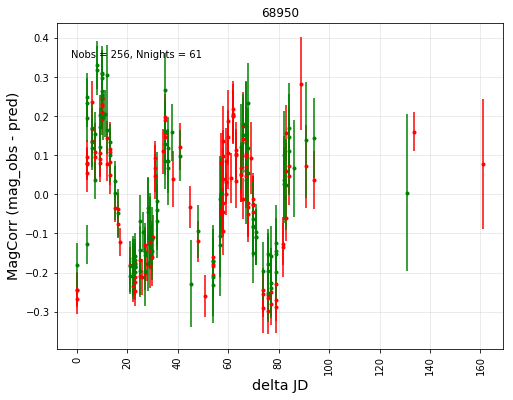

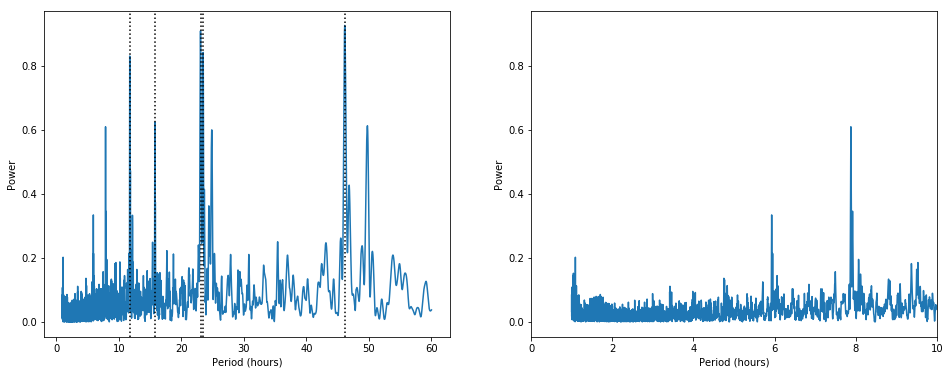

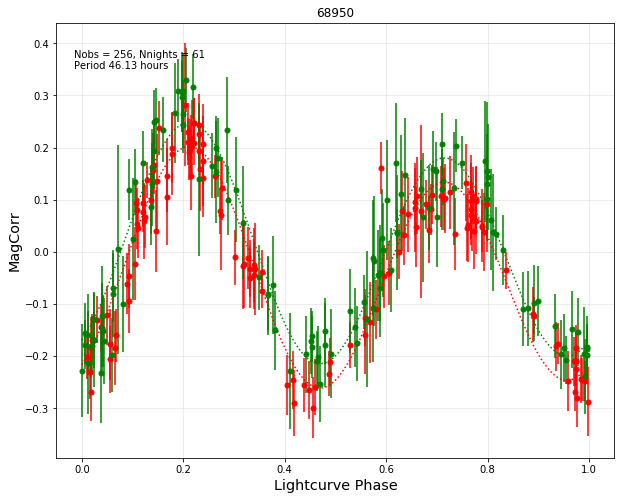

In [14]:
# Fit the lightcurve. 
lc = lcc.LCObject(min_period=1.0/24.0, max_period=60.0/24.0, 
                  nsigma=3, Nterms_base=2, Nterms_band=0)
df = ast.translate_df()
# lightcurve fitting with gatspy.periodic.LombScargleMultiband - 
# multiple band, multi-component lightcurve fitting using LS methods
figs = lc(df, ast.offsets)

In [15]:
# See the individual methods, if 
help(lc)

Help on LCObject in module sso_tools.lightcurves.lc_utils object:

class LCObject(builtins.object)
 |  Methods defined here:
 |  
 |  __call__(self, lcobs, photoffsets=None, outfile=None)
 |      Call self as a function.
 |  
 |  __init__(self, min_period=0.041666666666666664, max_period=2.5, nsigma=3, Nterms_base=2, Nterms_band=0)
 |      Parameters
 |      ----------
 |      min_period: float, opt
 |          Minimum period to fit for, in days.
 |      max_period: float, opt
 |          Maximum period to fit for, in days.
 |      nsigma: int, opt
 |          Number of standard deviations to allow around the mean, before rejecting input data points.
 |      Nterms_base: int, opt
 |          Number of terms for the base LS fit. Default 2.
 |      Nterms_band: int, opt
 |          Number of terms to allow between bandpasses. Default 1.
 |  
 |  calc_chisq(self, period=None)
 |  
 |  fit_model(self)
 |      Fit the lightcurve data using periodic.LombScargleMultiband.
 |  
 |  make_auto_p